In [1]:
import numpy as np;
import math as m;

### Generate points

In [2]:
def ExactSolutionImpl(x1, x2):
  return 10 * m.sin(10 * ((x1 - 0.5) ** 2 + (x2 - 0.5) ** 2))

ExactSolution = np.vectorize(ExactSolutionImpl)

In [3]:
N = 40
Lx, Ly = 1, 1
input_filename = "input.txt"

In [4]:
rng = np.random.default_rng(seed=42)
coords = rng.random((2, N)).T
coords[:, 0] = coords[:, 0] * Lx
coords[:, 1] = coords[:, 1] * Ly

In [5]:
values = ExactSolution(coords[:, 0], coords[:, 1])
values.shape

(40,)

In [6]:
np.savetxt(input_filename, np.c_[coords, values], fmt="%20.15lf")

### RBF interpolation

In [7]:
from scipy.interpolate import RBFInterpolator;
import matplotlib.pyplot as plt

In [8]:
Nx, Ny = 10, 10

In [9]:
input_data = np.loadtxt(input_filename, dtype='float')
input_data.shape

(40, 3)

In [10]:
coords = input_data[:, [0, 1]]
values = input_data[:, 2]

In [11]:
grid = np.mgrid[0:Lx:(Nx * 1j), 0:Ly:(Ny * 1j)].reshape(2, -1).T
grid.shape

(100, 2)

In [12]:
grid_result = RBFInterpolator(coords, values)(grid)
grid_result.shape

(100,)

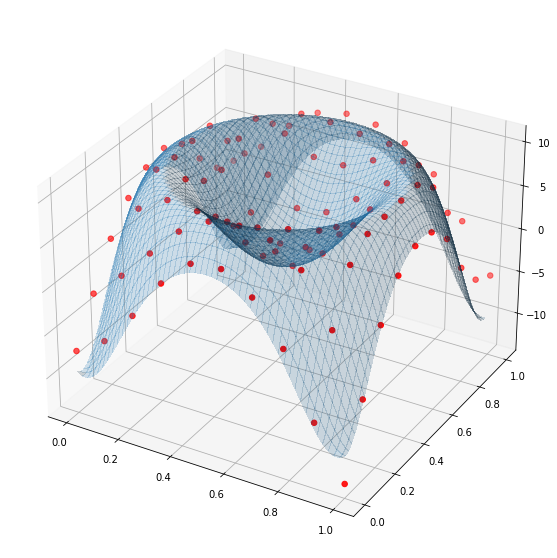

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(grid[:, 0], grid[:, 1], grid_result, s=30, c='red', label='result')

X, Y = np.meshgrid(np.arange(0, Lx, 0.01), np.arange(0, Ly, 0.01))
ax.plot_surface(X, Y, ExactSolution(X, Y), alpha=0.2,
                       linewidth=0, antialiased=False)

plt.show()